Contents
---
- [Creating DataFrames in Pandas](#create)
- [Viewing DataFrame info](#view)
- [Transforming DataFrames](#transform)
- [Series and Plots](#series)
- [Summary Statistics](#summary)
- [Reading CSV files](#csv)
- [Pickling](#pickling)

Run the following cell to import the required packages:

In [3]:
import pandas as pd # spreadsheet google spreadsheet 
import numpy as np # math np.sqrt np.sin
import random # simulations
import matplotlib.pyplot as plt # plots stuff
%matplotlib inline 

Creating DataFrames in Pandas
---
<a class="anchor" id="create"></a>

Pandas is a library that provides data structures and data analysis tools that will be very helpful to us.

Consider the student data below:

Student	Weight	Height	Gender

Mary	100	    62	    Female

Mike	120	    66	    Male

Joe	    140	    68	    Male

Janet	110	    62	    Female
 
Steve	160	    70	    Male

Alissa	140	    63	    Female

Alison	140	    66	    Female

Maya	110	    63	    Female

Ryan	180	    72	    Male

Paul	190	    72	    Male

Michael	200	    73	    Male




Pretty soon, we will want to work with data much larger and more interesting than 11 students. We will first want to create a data frame, which is a data structure in pandas. 

One way of doing this is to first create separate lists for the names, weights, height, and gender, and then make a data frame using a dictionary. 

In [2]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, 140, 110, 160, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, 70, 63, 66, 63, 72, 72, 73]
gender = ['F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M']

students = pd.DataFrame({'names': names, 'weight': weight, 'height': height, 'gender': gender})
students

,names,weight,height,gender
0,Mary,100,62,F
1,Mike,120,66,M
2,Joe,140,68,M
3,Janet,110,62,F
4,Steve,160,70,M
5,Alissa,140,63,F
6,Alison,140,66,F
7,Maya,110,63,F
8,Ryan,180,72,M
9,Paul,190,72,M


If instead we wanted the index to be the student name, we could specify that:

In [7]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, 140, 110, 160, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, 70, 63, 66, 63, 72, 72, 73]
gender = ['F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M']

students = pd.DataFrame({'weight': weight, 'height': height, 'gender': gender}, index = names)
students

,weight,height,gender
Mary,100,62,F
Mike,120,66,M
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M


Or, as another option, we could make tuples of each students' info and then specify the column names:

In [10]:
student_info = [('Mary', 100, 62, 'F'), ('Mike', 120, 66, 'M'), ('Joe', 140, 68, 'M'), ('Janet', 110, 62, 'F'), ('Steve', 160, 70, 'M'), ('Alissa', 140, 63, 'F'), ('Alison', 140, 66, 'F'), ('Maya', 110, 63, 'F'), ('Ryan', 180, 72, 'M'), ('Paul', 190, 72, 'M'), ('Michael', 200, 73, 'M')]
students = pd.DataFrame(student_info, columns = ['names', 'weight', 'height', 'gender'])
students

,names,weight,height,gender
0,Mary,100,62,F
1,Mike,120,66,M
2,Joe,140,68,M
3,Janet,110,62,F
4,Steve,160,70,M
5,Alissa,140,63,F
6,Alison,140,66,F
7,Maya,110,63,F
8,Ryan,180,72,M
9,Paul,190,72,M


Actually, perhaps we would prefer each row to be labeled by the student's name instead of the numbers 0 - 10. In that case, we'll store the names in a separate list and label them as our index:

In [527]:
student_info = [(100, 62, 'F'), (120, 66, 'M'), (140, 68, 'M'), (110, 62, 'F'), (160, 70, 'M'), (140, 63, 'F'), (140, 66, 'F'), (110, 63, 'F'), (180, 72, 'M'), (190, 72, 'M'), (200, 73, 'M')]
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
students = pd.DataFrame(student_info, columns = ['weight', 'height', 'gender'], index = names)
students

,weight,height,gender
Mary,100,62,F
Mike,120,66,M
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M


Another way to create a DataFrame is to create an empty data frame and then fill in values. For example, suppose I wanted to create a data frame of pet names, their breed, their gender, and their weight. I could type:

In [13]:
dogs= pd.DataFrame(index=['Rex', 'Rover', 'Polly'], columns=['breed', 'gender', 'weight'])
dogs

,breed,gender,weight
Rex,NaN,NaN,NaN
Rover,NaN,NaN,NaN
Polly,NaN,NaN,NaN


Here, NaN stands for "not a number", since we haven't added any data yet. We could insert data into each entry:

In [14]:
dogs.loc['Rex', 'gender'] = 'M'
dogs.loc['Rover', 'gender'] = 'M'
dogs.loc['Polly', 'gender'] = 'F'
dogs

,breed,gender,weight
Rex,NaN,M,NaN
Rover,NaN,M,NaN
Polly,NaN,F,NaN


If we wanted to fill in an entire column with the same value, we could type:

In [530]:
dogs['breed'] = 'labrador'
dogs

,breed,gender,weight
Rex,labrador,M,NaN
Rover,labrador,M,NaN
Polly,labrador,F,NaN


We'll discuss what to do later when not all of the entries have values.

We can add another column to our dog dataframe after creating it. If we want a new column to include dog colors, we can type:

In [531]:
dogs['color'] = ['white', 'black', 'black']
dogs

,breed,gender,weight,color
Rex,labrador,M,NaN,white
Rover,labrador,M,NaN,black
Polly,labrador,F,NaN,black


### Exercise -  sports 1
Create a dataframe called sports. It should have three kids in it. The index should be the numeric values 0,1,2. There should be columns for the student's first name and separate columns for their fall, winter, and spring sport.

In [29]:
#insert sports 1
sports = pd.DataFrame(columns = ["names", "fall", "spring", "fall"], index = [i for i in range(0,10,2)])
sports

,names,fall,spring,fall
0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN


### Exercise -  sports 2
Create a dataframe called sports2 where everything is the same except the index isn't a numeric value but instead the student's first name.

In [31]:
#insert sports 2
sports["summer"] = "TRACK"
display(sports)

,names,fall,spring,fall,summer
0,NaN,NaN,NaN,NaN,TRACK
2,NaN,NaN,NaN,NaN,TRACK
4,NaN,NaN,NaN,NaN,TRACK
6,NaN,NaN,NaN,NaN,TRACK
8,NaN,NaN,NaN,NaN,TRACK


### Exercise - sports 3
Add a column to sports2 that includes all the students' summer sport as swimming.

In [534]:
#insert sports 3


,Spring,Fall,Summer
Mary,NaN,NaN,Swimming
Hugh,NaN,NaN,Swimming
Ethan,NaN,NaN,Swimming


### Exercise - sports 4 
Edit a few of the students' sports by using the sports2.loc() command.

In [535]:
#insert sports 4


,Fall,Winter,Spring,Summer
Mary,NaN,NaN,Track,Swimming
Hugh,NaN,NaN,NaN,Swimming
Ethan,NaN,NaN,NaN,Swimming


### Exercise - sports 5
Change everyone's fall sport to soccer using one command.

In [536]:
#insert sports 5


,Fall,Winter,Spring,Summer
Mary,Soccer,NaN,Track,Swimming
Hugh,Soccer,NaN,NaN,Swimming
Ethan,Soccer,NaN,NaN,Swimming


Viewing DataFrame Info
---
<a class="anchor" id="view"></a>
In the future, we'll be working with really large data sets, and we won't want to view the whole thing at once because it will make our computer crash. To view the first few rows, type head:

In [537]:
students.head()

,weight,height,gender
Mary,100,62,F
Mike,120,66,M
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M


Or to print the last few rows, type:

In [538]:
students.tail()

,weight,height,gender
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M
Michael,200,73,M


If we want to view the data type of each column in our data frame, and figure out many values might be empty, we can type:

In [539]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Mary to Michael
Data columns (total 3 columns):
weight    11 non-null int64
height    11 non-null int64
gender    11 non-null object
dtypes: int64(2), object(1)
memory usage: 352.0+ bytes


If we wanted to specify that we wanted the third through 6th rows, we could type:

In [540]:
students[3:7]

,weight,height,gender
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F


If we wanted to see the weight and gender of the first three students, we could type the following (since weight and gender are stored in the 0th and 2nd columns):

In [541]:
students.iloc[0:3,[0,2]]

,weight,gender
Mary,100,F
Mike,120,M
Joe,140,M


Often, we'll only want to look at data that satisifies certain criteria. In that case, we can introduce Boolean indexing, so that only data that satisfies the conditions gets viewed. For example, suppose we only want to print the info for the females. We could type:

In [542]:
students[students.gender == 'F']

,weight,height,gender
Mary,100,62,F
Janet,110,62,F
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F


If we only wanted to view the info for students who were girls AND weighed at least 140, we could type:

In [543]:
students[(students.gender == 'F') & (students.weight >= 140)]

,weight,height,gender
Alissa,140,63,F
Alison,140,66,F


If we only wanted to view students who were girls OR weighed at least 140, we could type:

In [544]:
students[(students.gender == 'F') | (students.weight >= 140)]

,weight,height,gender
Mary,100,62,F
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M
Michael,200,73,M


Note: In Python you can use the words "and" and "or", but in Pandas you must use "&" and "|" to denote them or else you'll get an error.

Recall that "Ryan" was located in the 9th row (in the index 8). We could get his info this way:

In [545]:
students.iloc[8]

weight    180
height     72
gender      M
Name: Ryan, dtype: object

"iloc" refers to the index position. If we wanted to look Ryan's info up by his label, we could use "loc":

In [546]:
students.loc['Ryan']

weight    180
height     72
gender      M
Name: Ryan, dtype: object

Suppose we wanted Ryan's weight. We could type:

In [547]:
students.loc['Ryan']['weight']

180

To get the column names, type:

In [548]:
students.columns

Index(['weight', 'height', 'gender'], dtype='object')

To get each row of data, type:

In [549]:
students.values

array([[100, 62, 'F'],
       [120, 66, 'M'],
       [140, 68, 'M'],
       [110, 62, 'F'],
       [160, 70, 'M'],
       [140, 63, 'F'],
       [140, 66, 'F'],
       [110, 63, 'F'],
       [180, 72, 'M'],
       [190, 72, 'M'],
       [200, 73, 'M']], dtype=object)

To get just the weights, we have a few options. We can type:

In [550]:
students['weight']

Mary       100
Mike       120
Joe        140
Janet      110
Steve      160
Alissa     140
Alison     140
Maya       110
Ryan       180
Paul       190
Michael    200
Name: weight, dtype: int64

Or, we can type:

In [551]:
students.weight

Mary       100
Mike       120
Joe        140
Janet      110
Steve      160
Alissa     140
Alison     140
Maya       110
Ryan       180
Paul       190
Michael    200
Name: weight, dtype: int64

Or, we can type:

In [552]:
students.weight.values

array([100, 120, 140, 110, 160, 140, 140, 110, 180, 190, 200])

Be careful of the difference between typing students.weight and students.weight.values. 

students.weight returns the info in a datatype called a Series (see that there are two columns that get printed - the first is an index). 

students.weight.values returns the info in a list (more specifically, a numpy array).

### Exercises - pets
For the following exercises, use the pets dataframe below.

In [553]:
names = ['Rover', 'Rex', 'Polly', 'Putin']
pets = [(100, 'german shepard', 'dog'), (20, 'labrador', 'dog'), (5, None, 'bird'), (15, 'siamese', 'cat')]
pets = pd.DataFrame(pets, index = names, columns = ['weight', 'breed', 'species'])
pets

,weight,breed,species
Rover,100,german shepard,dog
Rex,20,labrador,dog
Polly,5,None,bird
Putin,15,siamese,cat


### Exercise - pets 1
Use a built-in command to figure out how many blank entries are in your data frame in one line.

In [554]:
#insert exercise 1
pets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Rover to Putin
Data columns (total 3 columns):
weight     4 non-null int64
breed      3 non-null object
species    4 non-null object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


### Exercise - pets 2 
Print the column names in your data frame.

In [555]:
#insert exercise 2
pets.columns

Index(['weight', 'breed', 'species'], dtype='object')

### Exercise - pets 3
Print just Rex's info.

In [556]:
#insert exercise 3
pets.loc['Rex']

weight           20
breed      labrador
species         dog
Name: Rex, dtype: object

### Exercise - pets 4
Print just Polly's weight by using a.) loc and b.) iloc.

In [557]:
#insert exercise 4
pets.iloc[2]
pets.loc['Polly']

weight        5
breed      None
species    bird
Name: Polly, dtype: object

### Exercise - pets 5
Print just the animals' breeds and species in one line.

In [558]:
#insert exercise 5
pets.iloc[0:4,[1,2]]

,breed,species
Rover,german shepard,dog
Rex,labrador,dog
Polly,None,bird
Putin,siamese,cat


### Exercise - pets 6
Print all of the info for the animals that are dogs in one line.

In [559]:
#insert exercise 6
pets[pets.species == 'dog']

,weight,breed,species
Rover,100,german shepard,dog
Rex,20,labrador,dog


### Exercise - pets 7

Print all of the info for the animals that are dogs OR the animals that weigh less than 10 pounds.

In [560]:
#insert exercise 7

pets[(pets.species == 'dog')|(pets.weight < 10)]

,weight,breed,species
Rover,100,german shepard,dog
Rex,20,labrador,dog
Polly,5,None,bird


Transforming the data
---
<a class="anchor" id="transform"></a>



Let's create our student data frame again:

In [561]:
student_info = [(100, 62, 'F'), (120, 66, 'M'), (140, 68, 'M'), (110, 62, 'F'), (160, 70, 'M'), (140, 63, 'F'), (140, 66, 'F'), (110, 63, 'F'), (180, 72, 'M'), (190, 72, 'M'), (200, 73, 'M')]
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
students = pd.DataFrame(student_info, columns = ['weight', 'height', 'gender'], index = names)
students

,weight,height,gender
Mary,100,62,F
Mike,120,66,M
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M


One thing that you might want to do at some point is switch the shape of how you view the data. Applying the transpose of the matrix will switch the rows and columns:

In [562]:
students.T

,Mary,Mike,Joe,Janet,Steve,Alissa,Alison,Maya,Ryan,Paul,Michael
weight,100,120,140,110,160,140,140,110,180,190,200
height,62,66,68,62,70,63,66,63,72,72,73
gender,F,M,M,F,M,F,F,F,M,M,M


Another thing that you'll definitely want to do at some point is sort data. Suppose we wanted to sort the data so that the names were in alphabetical order. Using sort with axis = 0 refers to sorting the row names and axis = 1 refers to sorting by column names. If we want to alphabetize the rows we could type:

In [563]:
students.sort_index(axis=0)

,weight,height,gender
Alison,140,66,F
Alissa,140,63,F
Janet,110,62,F
Joe,140,68,M
Mary,100,62,F
Maya,110,63,F
Michael,200,73,M
Mike,120,66,M
Paul,190,72,M
Ryan,180,72,M


To sort by column names, type:

In [564]:
students.sort_index(axis=1)

,gender,height,weight
Mary,F,62,100
Mike,M,66,120
Joe,M,68,140
Janet,F,62,110
Steve,M,70,160
Alissa,F,63,140
Alison,F,66,140
Maya,F,63,110
Ryan,M,72,180
Paul,M,72,190


If instead we wanted to sort by weight, from biggest to smallest, we could type:

In [565]:
students.sort_values(by='weight', ascending = False)

,weight,height,gender
Michael,200,73,M
Paul,190,72,M
Ryan,180,72,M
Steve,160,70,M
Joe,140,68,M
Alissa,140,63,F
Alison,140,66,F
Mike,120,66,M
Janet,110,62,F
Maya,110,63,F


Note that sorting the students did not permanently change the order of the data frame:

In [566]:
students

,weight,height,gender
Mary,100,62,F
Mike,120,66,M
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M


If you want the change to be permanent, you can re-save students as:


students = students.sort_values(...) 

Or you can include the argument "inplace = True":

In [567]:
students.sort_values(by='weight', ascending = False, inplace = True)
students

,weight,height,gender
Michael,200,73,M
Paul,190,72,M
Ryan,180,72,M
Steve,160,70,M
Joe,140,68,M
Alissa,140,63,F
Alison,140,66,F
Mike,120,66,M
Janet,110,62,F
Maya,110,63,F


If we wanted to add another two students to the data, we could first make a new DataFrame for the new students:

In [568]:
newstudents = pd.DataFrame([(150, 62, 'M'), (170, 65, 'F')], columns = ['weight', 'height', 'gender'], index = ['Matt', 'Jen'])
print(newstudents)

      weight  height gender
Matt     150      62      M
Jen      170      65      F


And then append these new students to the original table:

In [569]:
students = students.append(newstudents)
students

,weight,height,gender
Michael,200,73,M
Paul,190,72,M
Ryan,180,72,M
Steve,160,70,M
Joe,140,68,M
Alissa,140,63,F
Alison,140,66,F
Mike,120,66,M
Janet,110,62,F
Maya,110,63,F


Lastly, what if you wanted to change the column names from weight and height to weight_lb and height_in, respectively, to denote units?

In [570]:
students=students.rename(columns={"weight": "weight_lb", "height": "height_in"})
students

,weight_lb,height_in,gender
Michael,200,73,M
Paul,190,72,M
Ryan,180,72,M
Steve,160,70,M
Joe,140,68,M
Alissa,140,63,F
Alison,140,66,F
Mike,120,66,M
Janet,110,62,F
Maya,110,63,F


### Missing Data
Notice that there are some missing values in the table below:

In [571]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, np.nan, 110, np.nan, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, np.nan, 63, 66, np.nan, 72, 72, 73]
age = [16, 16, 17, 16, np.nan, 15, 15, 19, 18, 12, 16]

df = pd.DataFrame({'weight': weight, 'height': height, 'age': age}, index=names)
df

,weight,height,age
Mary,100.0,62.0,16.0
Mike,120.0,66.0,16.0
Joe,NaN,68.0,17.0
Janet,110.0,62.0,16.0
Steve,NaN,NaN,NaN
Alissa,140.0,63.0,15.0
Alison,140.0,66.0,15.0
Maya,110.0,NaN,19.0
Ryan,180.0,72.0,18.0
Paul,190.0,72.0,12.0


We can check which values are null by typing:

In [572]:
df.isnull()

,weight,height,age
Mary,False,False,False
Mike,False,False,False
Joe,True,False,False
Janet,False,False,False
Steve,True,True,True
Alissa,False,False,False
Alison,False,False,False
Maya,False,True,False
Ryan,False,False,False
Paul,False,False,False


Actually, an even faster way to spot which columns have missing values and how many they have is using "info". We see that the weight and height columns have two missing values each:

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Mary to Michael
Data columns (total 3 columns):
weight    9 non-null float64
height    9 non-null float64
age       10 non-null float64
dtypes: float64(3)
memory usage: 352.0+ bytes


We can disregard rows that are missing ALL values by typing the following. This will only get rid of Steve since only Steve had all of his data missing:

In [574]:
df = df.dropna(how='all')
df

,weight,height,age
Mary,100.0,62.0,16.0
Mike,120.0,66.0,16.0
Joe,NaN,68.0,17.0
Janet,110.0,62.0,16.0
Alissa,140.0,63.0,15.0
Alison,140.0,66.0,15.0
Maya,110.0,NaN,19.0
Ryan,180.0,72.0,18.0
Paul,190.0,72.0,12.0
Michael,200.0,73.0,16.0


If instead we wanted to drop rows that had ANY data missing, we would you the keyword "any":

In [575]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, np.nan, 110, np.nan, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, np.nan, 63, 66, np.nan, 72, 72, 73]
age = [16, 16, 17, 16, np.nan, 15, 15, 19, 18, 12, 16]

df = pd.DataFrame({'weight': weight, 'height': height, 'age': age}, index=names)


df = df.dropna(how='any')
df

,weight,height,age
Mary,100.0,62.0,16.0
Mike,120.0,66.0,16.0
Janet,110.0,62.0,16.0
Alissa,140.0,63.0,15.0
Alison,140.0,66.0,15.0
Ryan,180.0,72.0,18.0
Paul,190.0,72.0,12.0
Michael,200.0,73.0,16.0


If we wanted to drop rows only if they were missing data in their height or age columns, we could type:

In [576]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, np.nan, 110, np.nan, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, np.nan, 63, 66, np.nan, 72, 72, 73]
age = [16, 16, 17, 16, np.nan, 15, 15, 19, 18, 12, 16]

df = pd.DataFrame({'weight': weight, 'height': height, 'age': age}, index=names)


df = df.dropna(subset = ['height', 'age'])
df

,weight,height,age
Mary,100.0,62.0,16.0
Mike,120.0,66.0,16.0
Joe,NaN,68.0,17.0
Janet,110.0,62.0,16.0
Alissa,140.0,63.0,15.0
Alison,140.0,66.0,15.0
Ryan,180.0,72.0,18.0
Paul,190.0,72.0,12.0
Michael,200.0,73.0,16.0


However, big data sets almost always have missing data, and it would be unfortunate to have to get rid of any rows that did contain some missing data. Therefore, we may want to fill that missing data in instead. One option is to fill this data in with 0:

In [577]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, np.nan, 110, np.nan, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, np.nan, 63, 66, np.nan, 72, 72, 73]
age = [16, 16, 17, 16, np.nan, 15, 15, 19, 18, 12, 16]

df = pd.DataFrame({'weight': weight, 'height': height, 'age': age}, index=names)

df = df.fillna(0)
df

,weight,height,age
Mary,100.0,62.0,16.0
Mike,120.0,66.0,16.0
Joe,0.0,68.0,17.0
Janet,110.0,62.0,16.0
Steve,0.0,0.0,0.0
Alissa,140.0,63.0,15.0
Alison,140.0,66.0,15.0
Maya,110.0,0.0,19.0
Ryan,180.0,72.0,18.0
Paul,190.0,72.0,12.0


In some cases, filling missing data in with 0 might be exactly what you want to do. For example, if colleges were supposed to report what percentage of their students graduated, but a few colleges did not, you might want to penalize them with "0" because their lack of information might suggest some shadiness going on. However, in many other cases, you would prefer to just fill in the missing data with whatever the average of that columns' non-null values are. We will do this next:

In [578]:
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, np.nan, 110, np.nan, 140, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, np.nan, 63, 66, np.nan, 72, 72, 73]
age = [16, 16, 17, 16, np.nan, 15, 15, 19, 18, 12, 16]

df = pd.DataFrame({'weight': weight, 'height': height, 'age': age}, index=names)

df['weight'] = df['weight'].fillna(np.mean(df['weight']))
df['height'] = df['height'].fillna(np.mean(df['height']))
df

,weight,height,age
Mary,100.000000,62.000000,16.0
Mike,120.000000,66.000000,16.0
Joe,143.333333,68.000000,17.0
Janet,110.000000,62.000000,16.0
Steve,143.333333,67.111111,NaN
Alissa,140.000000,63.000000,15.0
Alison,140.000000,66.000000,15.0
Maya,110.000000,67.111111,19.0
Ryan,180.000000,72.000000,18.0
Paul,190.000000,72.000000,12.0


Notice that this changed our column types from integers to floats (decimals). If we wanted to change it back, we could use astype:

In [579]:
df['height'] = df['height'].astype(int)
df['weight'] = df['weight'].astype(int)
df

,weight,height,age
Mary,100,62,16.0
Mike,120,66,16.0
Joe,143,68,17.0
Janet,110,62,16.0
Steve,143,67,NaN
Alissa,140,63,15.0
Alison,140,66,15.0
Maya,110,67,19.0
Ryan,180,72,18.0
Paul,190,72,12.0


### Exercises - More sports
For the exercises below, use the following data frame.

In [580]:
sports = [('Soccer', None, 'Tennis', 3), (None, None, None, None), ('Soccer', None, 'Lacrosse', 5), ('Soccer', 'Basketball', 'Lacrosse', 4), (None, 'Basketball', 'Lacrosse', 2)]
sports = pd.DataFrame(sports, index = ['Lauren', 'Paul', 'Jack', 'Max', 'Lucy'], columns = ['fall', 'winter', 'spring', 'varsity letters'])
sports

,fall,winter,spring,varsity letters
Lauren,Soccer,None,Tennis,3.0
Paul,None,None,None,NaN
Jack,Soccer,None,Lacrosse,5.0
Max,Soccer,Basketball,Lacrosse,4.0
Lucy,None,Basketball,Lacrosse,2.0


### Exercise - More sports 1
Delete unathletic Paul from the data set since all of his sports are listed as null.

In [581]:
#insert more sports 1
sports = sports.dropna(how='all')
sports

,fall,winter,spring,varsity letters
Lauren,Soccer,None,Tennis,3.0
Jack,Soccer,None,Lacrosse,5.0
Max,Soccer,Basketball,Lacrosse,4.0
Lucy,None,Basketball,Lacrosse,2.0


### Exercise - More Sports 2
Fill in the missing fall sports with the sport "weight lifting" and the missing winter sports with "yoga" using "fillna".

In [582]:
#insert more sports 2
sports = [('Soccer', None, 'Tennis', 3), (None, None, None, None), ('Soccer', None, 'Lacrosse', 5), ('Soccer', 'Basketball', 'Lacrosse', 4), (None, 'Basketball', 'Lacrosse', 2)]
sports = pd.DataFrame(sports, index = ['Lauren', 'Paul', 'Jack', 'Max', 'Lucy'], columns = ['fall', 'winter', 'spring', 'varsity letters'])
sports['fall'] = sports['fall'].fillna('weight lifting')
sports['winter'] = sports['winter'].fillna('yoga')

sports


,fall,winter,spring,varsity letters
Lauren,Soccer,yoga,Tennis,3.0
Paul,weight lifting,yoga,None,NaN
Jack,Soccer,yoga,Lacrosse,5.0
Max,Soccer,Basketball,Lacrosse,4.0
Lucy,weight lifting,Basketball,Lacrosse,2.0


### Exercise - More Sports 3
Sort the dataframe by student name.

In [583]:
#insert more sports 3
sports
sports.sort_index(axis=0)

,fall,winter,spring,varsity letters
Jack,Soccer,yoga,Lacrosse,5.0
Lauren,Soccer,yoga,Tennis,3.0
Lucy,weight lifting,Basketball,Lacrosse,2.0
Max,Soccer,Basketball,Lacrosse,4.0
Paul,weight lifting,yoga,None,NaN


### Exercise - More Sports 4
Sort the dataframe by varsity letters in decending order.

In [584]:
#insert more sports 4
sports.sort_values(by='varsity letters', ascending = False)

,fall,winter,spring,varsity letters
Jack,Soccer,yoga,Lacrosse,5.0
Max,Soccer,Basketball,Lacrosse,4.0
Lauren,Soccer,yoga,Tennis,3.0
Lucy,weight lifting,Basketball,Lacrosse,2.0
Paul,weight lifting,yoga,None,NaN


### Exercise - More Sports 5
Print Jack's winter sport.

In [585]:
#insert more sports 5
sports.loc['Jack']['winter']

'yoga'

### Exercise - More Sports 6
Print just the students who play soccer in the fall.

In [586]:
#insert more sports 6
sports = [('Soccer', None, 'Tennis', 3), (None, None, None, None), ('Soccer', None, 'Lacrosse', 5), ('Soccer', 'Basketball', 'Lacrosse', 4), (None, 'Basketball', 'Lacrosse', 2)]
sports = pd.DataFrame(sports, index = ['Lauren', 'Paul', 'Jack', 'Max', 'Lucy'], columns = ['fall', 'winter', 'spring', 'varsity letters'])
sports[sports.fall=='Soccer']


,fall,winter,spring,varsity letters
Lauren,Soccer,None,Tennis,3.0
Jack,Soccer,None,Lacrosse,5.0
Max,Soccer,Basketball,Lacrosse,4.0


## More data cleaning

Sometimes, you may want to change an entry. For example, we would like the word "eight" to be a numeric 8:

In [587]:
sports = [('Soccer', None, 'Tennis', 'eight'), ('Soccer', None, 'Lacrosse', 5), ('Soccer', 'Basketball', 'Lacrosse', 4), (None, 'Basketball', 'Lacrosse', 2)]
sports = pd.DataFrame(sports, index = ['Lauren', 'Paul', 'Jack', 'Lucy'], columns = ['fall', 'winter', 'spring', 'varsity letters'])
sports

,fall,winter,spring,varsity letters
Lauren,Soccer,None,Tennis,eight
Paul,Soccer,None,Lacrosse,5
Jack,Soccer,Basketball,Lacrosse,4
Lucy,None,Basketball,Lacrosse,2


We can change it as follows:

In [588]:
sports.loc['Lauren', 'varsity letters'] = 8
sports

,fall,winter,spring,varsity letters
Lauren,Soccer,None,Tennis,8
Paul,Soccer,None,Lacrosse,5
Jack,Soccer,Basketball,Lacrosse,4
Lucy,None,Basketball,Lacrosse,2


However, let's notice that the varsity letters column type is still an object (or string) as opposed to a numeric variable:

In [589]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Lauren to Lucy
Data columns (total 4 columns):
fall               3 non-null object
winter             2 non-null object
spring             4 non-null object
varsity letters    4 non-null object
dtypes: object(4)
memory usage: 320.0+ bytes


We can change it to integer if all the values can be classified as integers:

In [590]:
sports['varsity letters'] = sports['varsity letters'].astype(int)
sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Lauren to Lucy
Data columns (total 4 columns):
fall               3 non-null object
winter             2 non-null object
spring             4 non-null object
varsity letters    4 non-null int64
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


Series and Plotting
---
<a class="anchor" id="series"></a>
Let's recall our student data:

In [591]:
student_info = [(100, 62, 'F'), (120, 66, 'M'), (140, 68, 'M'), (110, 62, 'F'), (160, 70, 'M'), (140, 63, 'F'), (140, 66, 'F'), (110, 63, 'F'), (180, 72, 'M'), (190, 72, 'M'), (200, 73, 'M')]
names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
students = pd.DataFrame(student_info, columns = ['weight', 'height', 'gender'], index = names)
students

,weight,height,gender
Mary,100,62,F
Mike,120,66,M
Joe,140,68,M
Janet,110,62,F
Steve,160,70,M
Alissa,140,63,F
Alison,140,66,F
Maya,110,63,F
Ryan,180,72,M
Paul,190,72,M


The above table is a DataFrame, which is a data type in Pandas. Each of the columns are a Series, which is another data type. Remember that we can refer to the weight column series in two different ways. The first way is:

In [592]:
students.weight

Mary       100
Mike       120
Joe        140
Janet      110
Steve      160
Alissa     140
Alison     140
Maya       110
Ryan       180
Paul       190
Michael    200
Name: weight, dtype: int64

The second way is:

In [593]:
students['weight']

Mary       100
Mike       120
Joe        140
Janet      110
Steve      160
Alissa     140
Alison     140
Maya       110
Ryan       180
Paul       190
Michael    200
Name: weight, dtype: int64

Note that the data type of students is DataFrame.

In [594]:
type(students)

pandas.core.frame.DataFrame

The data type of their weight is a Series:

In [595]:
type(students['weight'])

pandas.core.series.Series

The data type of weight.values is a NumPy array:

In [596]:
type(students['weight'].values)

numpy.ndarray

We can save the students' weight and height in variables w and h and then plot them:

Text(0, 0.5, 'height')

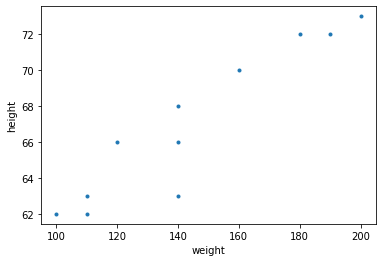

In [597]:
w = students.weight
h = students.height

plt.plot(w,h,'.')
plt.xlabel('weight')
plt.ylabel('height')


Summary Statistics
---
<a class="anchor" id="summary"></a>
Suppose we want to view the mean, standard deviation, and quartiles of the student data. We can type:

In [598]:
students.describe()

,weight,height
count,11.000000,11.000000
mean,144.545455,67.000000
std,34.165373,4.242641
min,100.000000,62.000000
25%,115.000000,63.000000
50%,140.000000,66.000000
75%,170.000000,71.000000
max,200.000000,73.000000


Or, we could individually find important values:

In [599]:
print(students.weight.count())
print(students.weight.mean())
print(students.weight.std())
print(students.weight.min())
print(students.weight.median())
print(students.weight.max())

11
144.54545454545453
34.16537322015856
100
140.0
200


If we wanted to view a frequency chart in descending order of frequency, we can type:

In [600]:
students.weight.value_counts()

140    3
110    2
180    1
120    1
190    1
100    1
200    1
160    1
Name: weight, dtype: int64

To go in ascending order of frequency, type:

In [601]:
students.weight.value_counts(ascending = True)

160    1
200    1
100    1
190    1
120    1
180    1
110    2
140    3
Name: weight, dtype: int64

If we wanted to sort in ascending order of weight, we could type:

In [602]:
students.weight.value_counts().sort_index()

100    1
110    2
120    1
140    3
160    1
180    1
190    1
200    1
Name: weight, dtype: int64

If we want to create a histogram to view the frequencies, we can type the following.

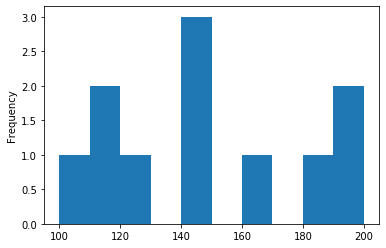

In [603]:
students.weight.plot.hist()

Let's give the histogram a bit more structure than just whatever the default values are. Note that since the weights are between 100-200 in increments of 10, to center each bar around the weight, I'll start at 95, end at 205, and increment by 10. Also, I'll make a black edge color to show separation between the bars:

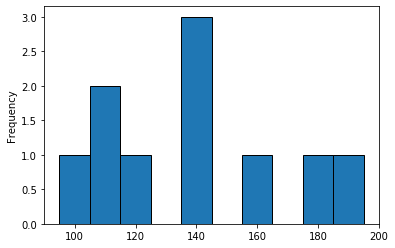

In [604]:
students.weight.plot.hist(edgecolor="black", bins=np.arange(95,205,10))

### Exercise - random 1
Below is a way to use list comprehensions to save 100 random integers between [0,5] in a list called x and 100 random integers between [20,50] in a list called y. Store these lists in a data frame called df where the name of the first column is x and the name of the second column is y. 

In [605]:
x = [random.randint(0,5) for x in range(100)]
y = [random.randint(20,50) for x in range(100)]

df = pd.DataFrame({'x': x, 'y' : y})
df
#insert random 1 below

,x,y
0,3,48
1,1,28
2,5,42
3,3,27
4,2,21
5,3,25
6,0,46
7,5,22
8,1,41
9,2,45


### Exercise - random 2
Plot x versus y using dots. Be sure to label axes.

Text(0, 0.5, 'y')

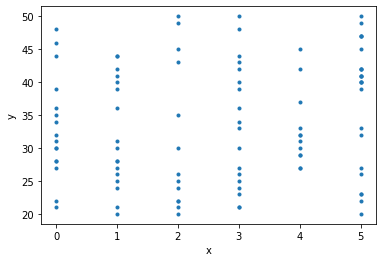

In [606]:
#insert random 2
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')

### Exercise - random 3
Find the mean, median, and standard deviation of the x list.

In [607]:
#insert random 3
print(df.x.median())
print(df.x.mean())
print(df.x.std())

3.0
2.65
1.7999719414199185


Reading CSV Files
---
<a class="anchor" id="csv"></a>
Typically, we won't be entering data manually. Instead, we'll be reading in large data files. Many data files are stored as CSV files. You can save Excel and Google Sheets files as CSV files. Suppose we want to read in a huge dataset of pregnancies from 2002. We can read it in and type "index_col = 0" to denote that we want the first column in the csv file treated as the index in our data frame:

In [608]:
preg = pd.read_csv('data/2002FemPreg.csv', index_col = 0)

Then to view the beginning of the file, type:

In [609]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


We see that the are 244 different attributes stored for each birth. How many births are contained in this dataframe?

In [610]:
len(preg)

13593

We could also use shape to see that there are 13593 rows and 244 columns:

In [611]:
preg.shape

(13593, 244)

How do know what the column names are?

In [612]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Note that there are so many that you won't be able to view all of them. If you wanted to view the 10th through 30th column names, you could type:

In [613]:
preg.columns[10:30]

Index(['cmotpreg', 'prgoutcome', 'cmprgend', 'flgdkmo1', 'cmprgbeg',
       'ageatend', 'hpageend', 'gestasun_m', 'gestasun_w', 'wksgest',
       'mosgest', 'dk1gest', 'dk2gest', 'dk3gest', 'bpa_bdscheck1',
       'bpa_bdscheck2', 'bpa_bdscheck3', 'babysex', 'birthwgt_lb',
       'birthwgt_oz'],
      dtype='object')

Often, some columns will contain a bit of whitespace at the end of the column name. For example, you could get tripped up for hours if the "age" column really was stored as "age " with an invisible space at the end. Therefore, it's a good habit to always first strip away any whitespace from the column names before you start working with the dataset:

In [614]:
preg.columns = preg.columns.str.strip()
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

One of the variables is pregnancy outcome - if the baby is carried to term (i.e., no miscarriages or still births), this variable is stored as "1".  Let's limit our calculations below to live births by doing the following:

In [615]:
live = preg[preg.outcome == 1]

How many births are we considering?

In [616]:
len(live)

9148

One of the variables is birth weight in pounds. Suppose we are interested in plotting a histogram of these weights. We can first save a weight variable as:

In [617]:
weight = live.birthwgt_lb

There are 9148 items in this list, but some of the data might be missing. To limit our calculations to weights that were listed, we can type:

In [618]:
live_weights = weight.dropna()
print(len(live_weights))

9084


We can see that 64 missing values have been removed. Okay, now we can see a summary of birth weight info:

In [619]:
live_weights.describe()

count    9084.000000
mean        6.832122
std         1.411447
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        15.000000
Name: birthwgt_lb, dtype: float64

And, we can view a frequency chart:

In [620]:
live_weights.value_counts()

7.0     3049
6.0     2223
8.0     1889
5.0      697
9.0      623
4.0      229
10.0     132
3.0       98
2.0       53
1.0       40
11.0      26
12.0      10
0.0        8
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

We can sort this by weight:

In [637]:
live_weights.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

We can plot a histogram:

Text(0.5, 0, 'weight')

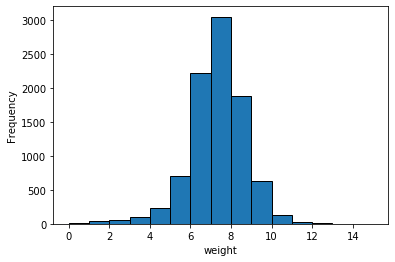

In [622]:
live_weights.plot.hist(edgecolor="black", bins=np.arange(0,16,1))
plt.xlabel('weight')

Suppose we are wondering whether first borns weight less than their later siblings. Let's save first borns and later siblings into different variables based on birth order:

In [623]:
firsts = live[live.birthord == 1].birthwgt_lb.dropna()
others = live[live.birthord != 1].birthwgt_lb.dropna()

What is the mean birth weight of each?

In [624]:
print(firsts.mean(), others.mean())

6.752968036529681 6.905824829931973


Hmm. It looks like others may weigh a bit more. Let's make a comparative histogram:

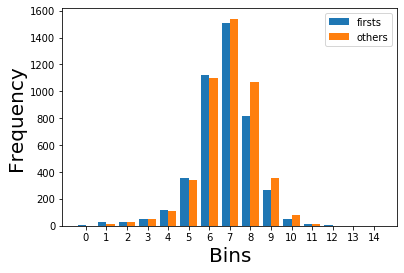

In [625]:
plt.hist([firsts, others],np.arange(-.5, 15.5, 1),label=['firsts', 'others'])
plt.xlabel('Bins', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(np.arange(0,15,1))
plt.legend()
plt.show()

Later when you learn more statistics, you can use a two-sample t-test to conclude whether the difference between first-born and later siblings' weights are actually statistically significant.

As another example, suppose we are wondering if the mother's age affects birthweight. Let's first reduce our consideration to just the mother's age and the baby's birth weight columns, and let's drop all rows where at least one of these two pieces of info is missing.

In [626]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
ages = live.agepreg
weights = live.totalwgt_lb

If we want to graph mother's age versus weight, we can type:

Text(0, 0.5, 'birth weight')

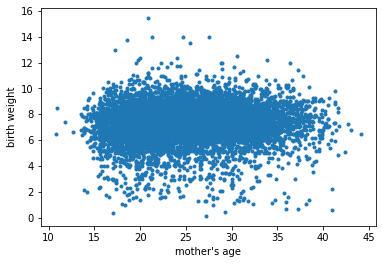

In [627]:
plt.plot(ages, weights,'.')
plt.xlabel("mother's age")
plt.ylabel("birth weight")


Since there are so many data points, it helps to make points that are clustered closely appear darker. To do this, play around with using an alpha value between 0 and 1:

Text(0, 0.5, 'birth weight')

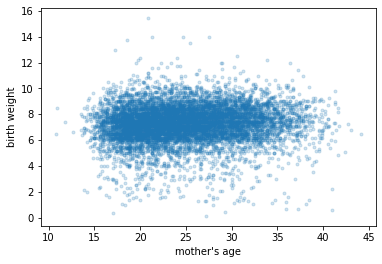

In [628]:
plt.plot(ages, weights,'.', alpha = 0.2)
plt.xlabel("mother's age")
plt.ylabel("birth weight")


It doesn't seem from the graph that there is a clear nonzero slope trend in the data. To confirm, we can calculate the correlation coefficient. Note that np.corrcoef actually returns a matrix but for our purposes, we only care about the entry that is in the top right entry which can be referenced as 0th row 1st column:

In [629]:
print(np.corrcoef(ages,weights))
print(np.corrcoef(ages,weights)[0,1])

[[1.         0.06883397]
 [0.06883397 1.        ]]
0.0688339703541091


Since this value is close to 0, this is further indiciation that there may not be a correlation between mother's age and baby's birth weight.

If we wanted to find the linear regression coefficients, we could type:

In [630]:
m, b = np.polyfit(ages, weights,1)
print(m,b)

0.017453851471802985 6.83039697331105


Recall what this means: for every 1 year increase in the woman's age, a linear model predicts that the baby's weight goes up by 0.017 pounds. 

If we want to plot the linear regression line, we can type:

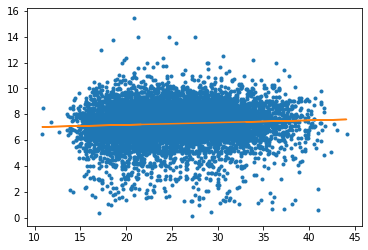

In [631]:
fit = np.polyfit(ages, weights,1)
fit_fn = np.poly1d(fit) 
plt.plot(ages, weights,'.', ages, fit_fn(ages))

### Exercises - students 0
Read in the file students' weight, height, and gender contained in the file students.csv. Strip away any whitespace from the column names.

In [642]:
#insert students 0
students = pd.read_csv('data/students.csv')
students.columns = students.columns.str.strip()
students

,gender,height,weight
0,F,69.040241,156
1,M,62.527374,119
2,M,77.650848,199
3,F,61.542532,116
4,M,72.011284,164
5,F,62.573919,124
6,M,68.499896,163
7,F,62.420066,110
8,M,62.837645,100
9,M,73.797526,185


### Exercises - students 1
View the students who weight less than 110. 

In [641]:
#insert students 1
students = students[students['weight']<110]

### Exercises - students 2
View the GIRLS who weigh less than 110.

In [634]:
#insert students 2
students = students[(students.weight <=110) & (students.gender == 'F')]
students

,gender,height,weight
18,F,60.315593,106
67,F,55.803395,75
103,F,58.820169,106


### Exercises - student 3
Make a frequency chart of the student weights, in decending order of frequency.

In [647]:
#insert students 3
students.weight.value_counts(ascending = False)

141    8
149    6
151    5
115    5
129    5
128    5
164    5
160    5
146    5
161    5
138    5
143    4
131    4
139    4
130    4
157    4
122    4
152    4
110    4
140    3
178    3
154    3
145    3
156    3
153    3
124    3
118    3
135    3
165    3
142    2
      ..
97     1
91     1
125    1
230    1
136    1
144    1
207    1
205    1
202    1
199    1
197    1
196    1
191    1
190    1
188    1
186    1
180    1
177    1
176    1
174    1
172    1
170    1
169    1
167    1
163    1
162    1
158    1
213    1
148    1
75     1
Name: weight, Length: 86, dtype: int64

### Exercises - students 4
Make a frequency chart of the student weights, in ascending order of weight.

In [687]:
#insert students 4
students.weight.value_counts().sort_index()

75     1
91     1
97     1
100    2
106    2
109    2
110    4
115    5
116    2
117    1
118    3
119    2
120    1
121    1
122    4
123    1
124    3
125    1
127    2
128    5
129    5
130    4
131    4
132    2
133    1
134    2
135    3
136    1
137    2
138    5
      ..
167    1
169    1
170    1
172    1
173    2
174    1
175    2
176    1
177    1
178    3
179    2
180    1
181    2
182    2
183    2
184    2
185    2
186    1
188    1
190    1
191    1
194    2
196    1
197    1
199    1
202    1
205    1
207    1
213    1
230    1
Name: weight, Length: 86, dtype: int64

### Exercises - students 5
Make a plot of student height versus student weight.

Text(0, 0.5, 'height')

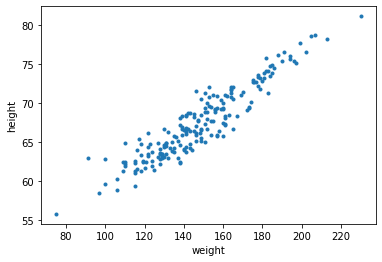

In [649]:
#insert students 5
w = students.weight
h = students.height

plt.plot(w,h,'.')
plt.xlabel('weight')
plt.ylabel('height')

### Exercises - students 6
What is the mean girl weight? The mean boy weight?

In [654]:
#insert students 6
print(students.weight[students['gender']=="F"].mean())
print(students.weight[students['gender']=="M"].mean())

134.18
152.35333333333332


### Exercises - students 7
Which gender has a larger weight spread?  Hint: think standard deviation.

In [657]:
#insert students 7
print(students.weight[students['gender']=="F"].std())
print(students.weight[students['gender']=="M"].std())

18.325503584694555
25.775264315992654


### Exercises - students 8
Make a comparative histogram of male and female student weight.

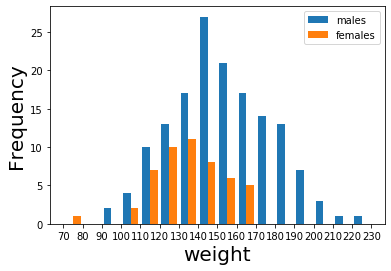

In [691]:
#insert students 8
males = students.weight[students['gender']=="M"]
females = students.weight[students['gender']=="F"]
plt.hist([males, females],np.arange(70, 240, 10),label=['males', 'females'])
plt.xlabel('weight', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(np.arange(70,240,10))
plt.legend()
plt.show()


Pickling
---
<a class="anchor" id="pickling"></a>

One last thing. Many times, we'll create dataframes in Pandas that we want to use later. We'd like to store them for safe keeping. For example, let's store our pets dataframe below:

In [682]:
pets = [('Rover', 100, 'german shepard', 'dog'), ('Rex', 20, 'labrador', 'dog'), ('Polly', 5, None, 'bird'), ('Putin', 15, 'siamese', 'cat')]
pets = pd.DataFrame(pets, columns = ['names', 'weight', 'breed', 'species'])
pets

,names,weight,breed,species
0,Rover,100,german shepard,dog
1,Rex,20,labrador,dog
2,Polly,5,None,bird
3,Putin,15,siamese,cat


If we want to store it in a long term format that others might be able to use and access as well, it's best to store it as a csv file:

In [683]:
pets.to_csv('data/pets.csv')

Are we sure that we created the file? Yes, because we can read it back in and view its contents:

In [681]:
pets = pd.read_csv('data/pets.csv', index_col = 0)
pets

,names,weight,breed,species
0,Rover,100,german shepard,dog
1,Rex,20,labrador,dog
2,Polly,5,NaN,bird
3,Putin,15,siamese,cat


There is also another file format you can store things in to access them conveniently. It's called a pickle file. Pickle files can be slower and less secure but they are convenient when you are just playing around with things you want to come back to later and no one needs to use the file but you. In addition, they are really nice because they will come into pandas exactly as you left them in pandas...meaning, you don't need to worry about reading in the appropriate header data, etc. To write your dataframe to a pickle file, type:

In [684]:
pets.to_pickle('data/petpickle.pkl')

To read your dataframe back in, type:

In [685]:
pets = pd.read_pickle('data/petpickle.pkl')
pets

,names,weight,breed,species
0,Rover,100,german shepard,dog
1,Rex,20,labrador,dog
2,Polly,5,None,bird
3,Putin,15,siamese,cat
